In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# pandas==1.5.2

Text(0.5, 0, 'Memory Used (mb)')

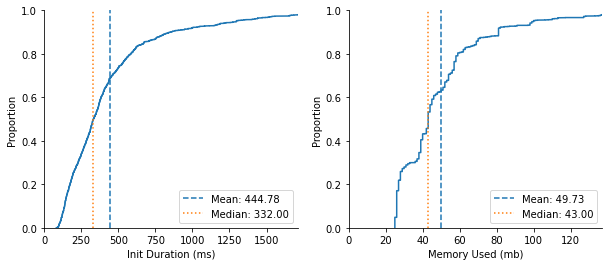

In [2]:
data = pd.read_csv("aws_metrics.csv")
_, axs = plt.subplots(1, 2, figsize=(10,4))

for i, col in enumerate(["billed duration (ms)", "max_memory_used (mb)"]):
    stats = [data[col].mean(), data[col].median()]
     
    sns.ecdfplot(data[[col]], ax=axs[i], legend=False)
    
    axs[i].plot([stats[0]]*2, [0,1], linestyle='--', label=f'Mean: {stats[0]:.2f}')
    axs[i].plot([stats[1]]*2, [0,1],linestyle=':', label=f'Median: {stats[1]:.2f}')
    axs[i].legend()

    x_max = data[col].quantile(q=0.98)
    axs[i].set_xlim(0, x_max)
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    
axs[0].set_xlabel("Init Duration (ms)")
axs[1].set_xlabel("Memory Used (mb)")

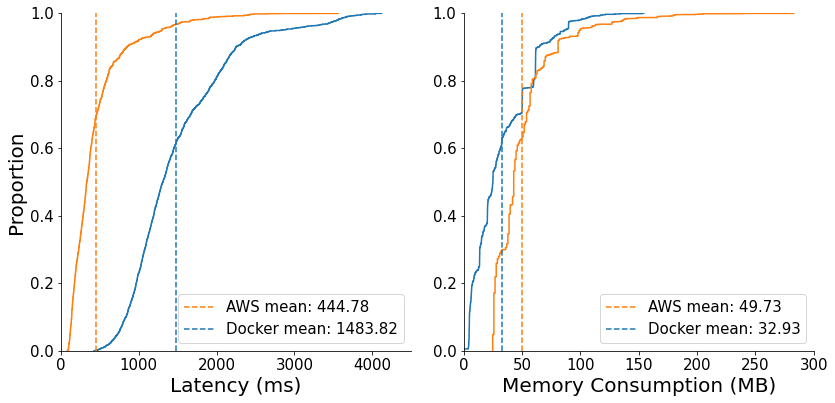

In [41]:
plt.rcParams.update({'font.size': 20})
legend_fontsize = 15
ticks_fontsize = 15

aws_csv = pd.read_csv("aws_metrics.csv")
docker_csv = pd.read_csv("docker_metrics.csv")

latency = pd.DataFrame({"aws": aws_csv["billed duration (ms)"],
                        "docker": docker_csv["received"] - docker_csv["req"]})
memory = pd.DataFrame({"aws": aws_csv["max_memory_used (mb)"],
                       "docker": docker_csv["mem"] / 1024**2})

_, axs = plt.subplots(1, 2, figsize=(12,6))   

c = ["C1", "C0"]
sns.ecdfplot(latency, ax=axs[0], palette=c, legend=False)
sns.ecdfplot(memory, ax=axs[1], palette=c, legend=False)

stat = [{
    "aws": {
        "mean": latency.mean()['aws'],
        "median": latency.median()['aws'],
    },
    "docker":
    {
        "mean": latency.mean()['docker'],
        "median": latency.median()['docker'],
    },
},{
    "aws": {
        "mean": memory.mean()['aws'],
        "median": memory.median()['aws'],
    },
    "docker":
    {
        "mean": memory.mean()['docker'],
        "median": memory.median()['docker'],
    },
}]

for i in range(2):
    axs[i].plot([stat[i]['aws']['mean']]*2, [0,1], linestyle='--', color='C1', label=f"AWS mean: {stat[i]['aws']['mean']:.2f}")
    # axs[i].plot([stat[i]['aws']['median']]*2, [0,1], linestyle=':', color='C1', label=f"AWS median: {stat[i]['aws']['median']:.2f}")
    axs[i].plot([stat[i]['docker']['mean']]*2, [0,1], linestyle='--', color='C0', label=f"Docker mean: {stat[i]['docker']['mean']:.2f}")
    #axs[i].plot([stat[i]['docker']['median']]*2, [0,1], linestyle=':', color='C0', label=f"Docker median: {stat[i]['docker']['median']:.2f}")

    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].legend(fontsize=legend_fontsize)
    
    axs[i].tick_params(axis='both', labelsize=ticks_fontsize)

axs[0].set_xlabel("Latency (ms)")
axs[1].set_xlabel("Memory Consumption (MB)")

axs[0].set_xlim(0, 4500)
axs[1].set_xlim(0, 300) 

axs[1].set_ylabel("")

plt.tight_layout()
plt.savefig("reqbench_perf.pdf")